# Assignment 1

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from ann_visualizer.visualize import ann_viz

### Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
data = pd.read_csv("./diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [6]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [7]:
oversampled_X, oversampled_Y = sm.fit_resample(X, y)

In [8]:
sc = StandardScaler()
oversampled_X = sc.fit_transform(oversampled_X)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, test_size=0.2)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([403, 397], dtype=int64))

In [12]:
epochs = 50

## Model without upsampling

In [13]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(8, input_shape=(8,)))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [15]:
history = model2.fit(X, y, 
                    validation_split=0.2,
#                     validation_data=(x_test, y_test), 
                    epochs=epochs)

Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 1.1225 - accuracy: 0.5391 - val_loss: 0.8402 - val_accuracy: 0.5584
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.6287 - val_loss: 0.7926 - val_accuracy: 0.4805
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6417 - val_loss: 0.7973 - val_accuracy: 0.6104
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.6759 - val_loss: 0.7457 - val_accuracy: 0.5130
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6564 - val_loss: 0.7507 - val_accuracy: 0.5519
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6547 - val_loss: 0.7789 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6808 - val_loss: 0.7223 - val_accuracy: 0.5974
Epoch 8/50
20/20 [=

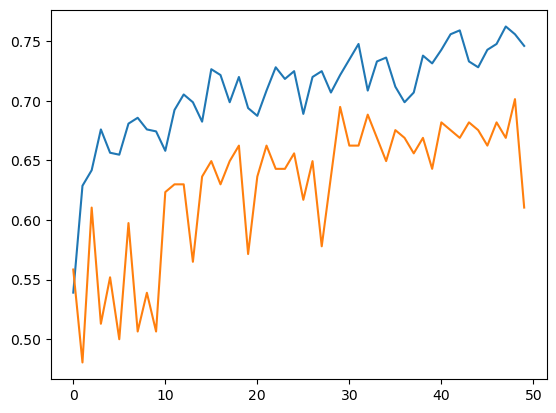

In [16]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

## Model with upsampled data

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(8,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 64)                576       
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 33801 (132.04 KB)
Trainable params: 3380

In [35]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, 
                    validation_split=0.2,
#                     validation_data=(x_test, y_test), 
                    epochs=epochs)

Epoch 1/50
20/20 [==============================] - 1s 8ms/step - loss: 0.6952 - accuracy: 0.5125 - val_loss: 0.6881 - val_accuracy: 0.5625
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5797 - val_loss: 0.6813 - val_accuracy: 0.6500
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6375 - val_loss: 0.6749 - val_accuracy: 0.6875
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6719 - val_loss: 0.6684 - val_accuracy: 0.7250
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.6969 - val_loss: 0.6615 - val_accuracy: 0.7500
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.7234 - val_loss: 0.6537 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.7375 - val_loss: 0.6456 - val_accuracy: 0.7563
Epoch 8/50
20/20 [==

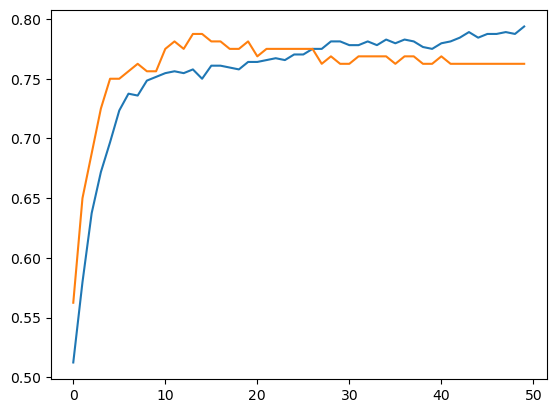

In [37]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])

In [38]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


In [39]:
y_pred = y_pred.round()

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 18],
       [19, 84]], dtype=int64)

<AxesSubplot:>

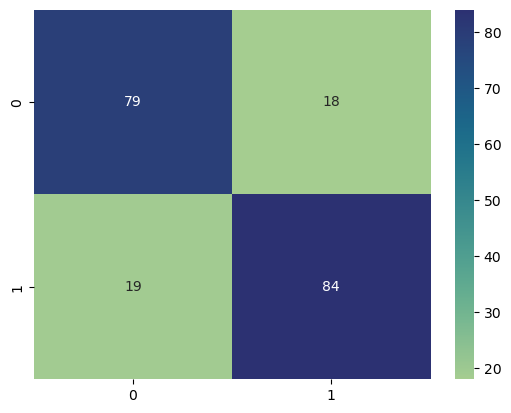

In [41]:
sns.heatmap(cm, cmap='crest', annot=True)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.82      0.82      0.82       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200



### ann_viz gives error

In [43]:
ann_viz(model, title="My first neural network")

AttributeError: module 'keras.layers' has no attribute 'core'

### But, tensorflow plot_model works fine

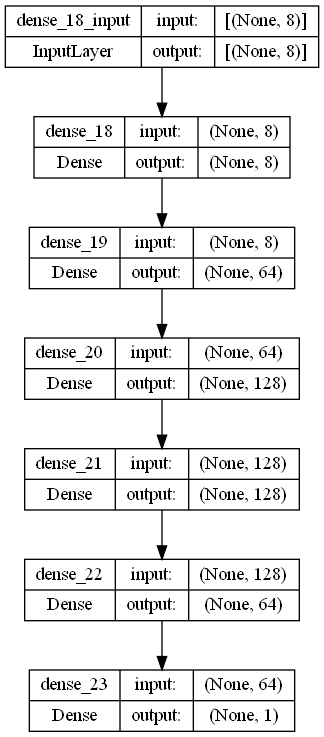

In [44]:
img_file = './model_arch.png'

tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)